In [4]:
%pip install pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Gràfiques amb Seaborn i Pandas

## Importacó de llibreries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

## Configuració de l'entorn

In [6]:
# Configurar visualitzacions inline
%matplotlib inline

# Configurar opcions de display de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Configurar estil de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

## Estructura del projecte

In [7]:
# Directori base del projecte
BASE_DIR = os.path.dirname(os.path.abspath('main.ipynb'))
DATA_DIR = os.path.join(BASE_DIR, 'data')

# Crear directoris si no existeixen
os.makedirs(DATA_DIR, exist_ok=True)

print(f"Directori base: {BASE_DIR}")
print(f"Directori de dades: {DATA_DIR}")

Directori base: /home/super/Documents/2n/IA/Pandas/Seaborn/Seaborn_pandas
Directori de dades: /home/super/Documents/2n/IA/Pandas/Seaborn/Seaborn_pandas/data


## Funcions

In [8]:
def obrir_fitxer(nom_carpeta: str, fitxer: str):
    """Funció per buscar fitxer i transformar-lo en DataFrame

    Args:
        nom_carpeta (str): carpeta on es troba el fitxer
        fitxer (str): fitxer csv que volem transformar

    Returns:
        DataFrame excepció en cas d'error
    """
    if not nom_carpeta:
        FITXER = os.path.join(BASE_DIR, fitxer)
    else:
        FITXER = os.path.join(BASE_DIR, nom_carpeta, fitxer)
    
    if not os.path.isfile(FITXER):
        raise FileNotFoundError(f"El fitxer {FITXER} no existeix")
    
    dataframe = pd.read_csv(FITXER, encoding="utf-8")
    return dataframe

## Cárrega de dades 

In [9]:
try:
    df = obrir_fitxer("data", "titanic.csv")
    print(f"Dades carregades correctament.")
    print(f"Dimensions: {df.shape[0]} files, {df.shape[1]} columnes")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")

Dades carregades correctament.
Dimensions: 887 files, 8 columnes


## 1. Fes una distribució per edats dels pasatgers. Utilitza un gràfic histplot i canvieu els colors de la gràfica més els labels dels eixos x, y.

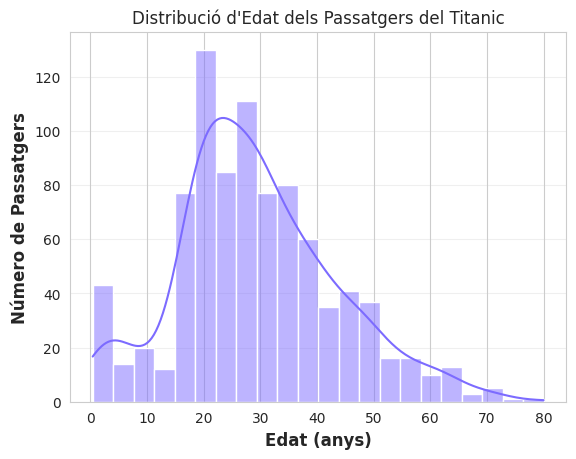

In [27]:
# 1. Distribució per edats dels pasatgers
#? Creem un hitograma amb les edats, una corba de densitat (kde) i un color personalitzat
sns.histplot(data=df, x='Age', kde=True, color="#7C6BFF") 

#? Personalitzem les etiquetes dels eixos i el títol
plt.xlabel('Edat (anys)', fontsize=12, fontweight='bold') 
plt.ylabel('Número de Passatgers', fontsize=12, fontweight='bold')
plt.title('Distribució d\'Edat dels Passatgers del Titanic')
#? Afegim una graella només a l'eix y per millorar la llegibilitat
plt.grid(axis='y', alpha=0.3) 

## 2. Fes els 5 bitllets més cars i fes els 5 bitllets més barats. En la mateixa gràfica mostra la mitja del preu. Utilitza scatterplot tot canviant els colors i els labels dels eixos x, y.

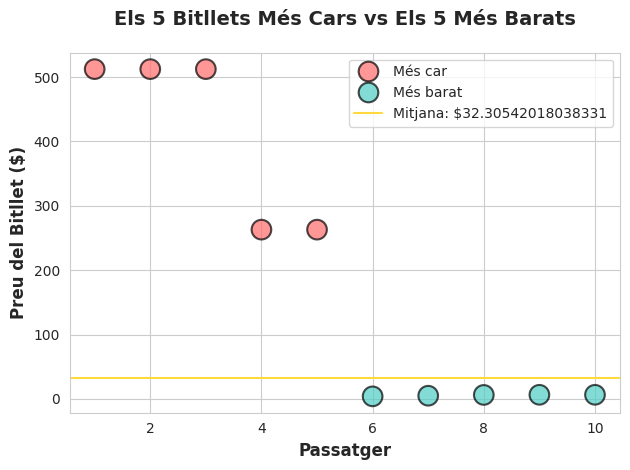

Els 5 bitllets més cars:
                                  Name      Fare  Pclass  Survived
257                    Miss. Anna Ward  512.3292       1         1
676  Mr. Thomas Drake Martinez Cardeza  512.3292       1         1
733              Mr. Gustave J Lesurer  512.3292       1         1
27       Mr. Charles Alexander Fortune  263.0000       1         0
87           Miss. Mabel Helen Fortune  263.0000       1         1

Els 5 bitllets més barats:
                                Name    Fare  Pclass  Survived
376               Mr. Tannous Betros  4.0125       3         0
868          Mr. Frans Olof Carlsson  5.0000       1         0
324         Mr. Johan Hansen Nysveen  6.2375       3         0
839        Mr. Peter L Lemberopolous  6.4375       3         0
814  Mr. John Fredrik Alexander Holm  6.4500       3         0

Mitjana del preu: $32.30542018038331
Diferència entre més car i més barat: $512.3292


In [54]:
# 2. Els 5 bitllets més cars i els 5 més barats

# Eliminar files amb valors nuls a la columna Fare
df_fare = df.dropna(subset=['Fare'])

#? Creació d'una copia del df amb el valor de la columna Fare més alt
top_5_car = df_fare.nlargest(5, 'Fare').copy()
top_5_car['Categoria'] = 'Més car'

#? Creació d'una copia del df amb el valor de la columna Fare més baix major a 0
top_5_barat = df_fare[df_fare['Fare'] > 0].nsmallest(5, 'Fare').copy()
top_5_barat['Categoria'] = 'Més barat'

#? Combinar els dos DataFrames
dades_convinades = pd.concat([top_5_car, top_5_barat], ignore_index=True)

#? Crear un índex per a l'eix X
dades_convinades['Índex'] = range(1, len(dades_convinades) + 1)

#? Crear la gràfica
plt.figure()

#? Scatterplot amb colors diferenciats 
sns.scatterplot(data=dades_convinades, x='Índex', y='Fare', hue='Categoria',
                palette={'Més car': '#FF6B6B', 'Més barat': '#4ECDC4'},
                s=200, alpha=0.7, edgecolor='black', linewidth=1.5)

#? Mostrar la mitjana del preu
mitjana_fare = df_fare['Fare'].mean() # Amb .mean() obtenim la mitjana de la columna Fare
plt.axhline(y=mitjana_fare, color='#FFD93D', label=f'Mitjana: ${mitjana_fare}')

#? Labels i títol
plt.xlabel('Passatger', fontsize=12, fontweight='bold')
plt.ylabel('Preu del Bitllet ($)', fontsize=12, fontweight='bold')
plt.title('Els 5 Bitllets Més Cars vs Els 5 Més Barats', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, loc='upper right') # Ubicació de la llegenda a la part superior dreta

plt.tight_layout()
plt.show()

#? Mostrar estadístiques
print("Els 5 bitllets més cars:")
print(top_5_car[['Name', 'Fare', 'Pclass', 'Survived']].to_string())
print("\nEls 5 bitllets més barats:")
print(top_5_barat[['Name', 'Fare', 'Pclass', 'Survived']].to_string())
print(f"\nMitjana del preu: ${mitjana_fare}")
print(f"Diferència entre més car i més barat: ${df_fare['Fare'].max() - df_fare['Fare'].min()}")

## 3. Fes una gràfica a on hi hagi el % d'homes i el % de dones que van sobreviure. Utilitza la gràfica displot tot canviant els colors i els labels.

In [ ]:

#! Todo Fran

## 4. Escolliu vosaltres mateixos al realitzar un quadre estadistic i feu-ho amb la gràfica que considereu més oportuna

In [ ]:

#! Todo Fran